In [9]:
import os
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim import models
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
#import en_core_web_sm
#nlp=en_core_web_sm.load()
import spacy
import en_core_web_sm
nlp=spacy.load('en_core_web_sm')
import re
from spacy import displacy 
from spacy.matcher import Matcher
from spacy.tokens import Span
import networkx as nx
from tqdm import tqdm

#import gensim
#import nltk
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS #for stopwords
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.stem.porter import *

In [10]:
# !pip install spacy
# !pip install networkx
# !pip install en_core_web_sm
#!pip install -U spacy
#python -m spacy validate 
#python -m spacy download en_core_web_sm

In [11]:
df=pd.read_csv('Output_store_Reviewed.csv')
df.head()

,Date,Text,Sentiment,Topic
0,18-11-2020 17:45,#Samsung’s rumored #GalaxyS21 phone lineup is ...,Neutral,Promotional
1,18-11-2020 17:45,@ibrahimthecat @NotPenguino_ @TechHighest Actu...,Neutral,Comparision
2,18-11-2020 17:45,Our 20 hottest #BlackFriday #tech deals and sa...,Neutral,Marketing
3,18-11-2020 17:45,"If you are working from home, a tablet is a gr...",Positive,Marketing
4,18-11-2020 17:44,@Meowchado Nice tatoo \n\nDownload our automob...,Neutral,Marketing


In [12]:
#cleaning the text and cleaning the data

contraction_mapping={"ain't":"is not","aren't":"are not","can't":"cannot","cause":"because","could've":"could have","didn't":"did not",
                    "doesn't":"does not","don't":"does not","hadn't":"had not","hasn't":"has not","he'd":"he would","he'll":"he will",
                    "he's":"he is","how'd":"how did","how'd'y":"how do you","I'd":"I would","i'll":"i will","i'll've":"i will have","i'm":"i am",
                     "i've":"i have","it'd've":"it would have","it'll":"it will","it'll've":"it will have","it's":"it is","let's":"let us",
                     "mayn't":"may not","might've":"might have","mightn't":"might not","mightn't've":"might not have","mustn't":"must not",
                     "mustn't've":"must not have","needn't":"need not","needn't've":"need not have","oughtn't":"ought not",
                     "oughtn't've":"ought not have","shan't":"shall not","sha'n't":"shall not","she'd":"she would","she'd've":"she would have",
                     "she'll":"she will","she'll've":"she will have","should've":"should have","shouldn't":"should not","shouldn't've":"should not have",
                     "so've":"so we have","this's":"this is","that'd":"that would","that'd've":"that would have","that's":"that is","there's":"there is",
                     "there'd've":"there would have","there's":"there is","here's":"here is","they'd":"they would","they'll":"they will","they'll've":"they will have",
                     "they're":"they are","they've":"they have","wasn't":"was not","we'd":"we would","we'd've":"we would have","we'll":"we will","we'll've":"we will have",
                     "we've":"we have","weren't":"were not","what'll":"what will","what'll've":"what will have","where'd":"where would",
                     "where've":"where have","who'll":"who will","who'll've":"who will have","what's":"what is","what've":"what have","when's":"when is",
                     "when've":"when have","where'd":"where would","where've":"where have","who'll":"who will","who'll've":"who will have",
                     "who's":"who is","why's":"why is","why've":"why have","will've":"will have","won't":"will not","won't've":"will not have",
                     "would've":"would have","wouldn't":"would not","wouldn't've":"would not have","y'all":"you all","y'all'd":"you all would",
                     "y'all'd've":"you all would have","y'll're":"you all are","y'all've":"you all have","you'd":"you would","you'd've":"you would have",
                     "you'll":"you will","you'll've":"you will have","you're":"you are","you've":"you have"}

In [13]:
import nltk
from bs4 import BeautifulSoup
import re
#nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

from nltk.stem.wordnet import WordNetLemmatizer
lemma=WordNetLemmatizer()

In [14]:
# import nltk
# from bs4 import BeautifulSoup
# import re
# #nltk.download('stopwords')
# stop_words=set(stopwords.words('english'))
# from nltk.stem.wordnet import WordNetLemmatizer
# lemma=WordNetLemmatizer()

# def text_cleaner(text):
#     newString=text.lower()        #lower the text
#     #print(newString+'\n')
#     newString=re.sub(r"http\S+",'',newString)   #removing html tags
#     #print(newString+'\n')
#     newString=re.sub(r"@\S+","",newString)    #removing @handles
#     #print(newString+'\n')
#     newString=re.sub(r"^rt","",newString)     #removing the RT's
#     #print(newString+'\n')
#     newString=re.sub('"','',newString)        #remove the quotes
#     #print(newString+'\n')
#     newString=' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split()]) #contraction mapping of words
#     #print(newString+'\n'+'\n')
#     newString=re.sub(r"'s\b","",newString)    #removing the plurals and making singular
#     #print(newString+'\n')
#     newString=re.sub("[^a-zA-Z0-9]","",newString)   #removing anything thats not alphabet or a number
#     #print(newString+'\n')
    
#     #newString=re.sub(r'\([^]*\)','',newString)
#     #stop_free=" ".join([i for i in newString.lower().split() if i not in stop_words])
#     tokens=[w for w in newString.split() if not w in stop_words] #removing stop_words
#     tokens=[lemma.lemmatize(word) for word in tokens]
#     print(tokens)
#     long_words=[]
#     for i in tokens:
#         if len(i)>=2:
#             long_words.append(i)
#     #return(newString)
#     newString=(" ".join(long_words)).strip()
#     return (newString)
        

In [15]:
def Cleanthedata(text):
    newString=text.lower()
    newString=' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split()]) 
    text=(' '.join(re.sub("(RT @[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str(newString)).split()))   
    #print(text)
    return text 

In [16]:
# cleaned_text=" ".join(word for word in a1)
# cleaned_text


In [17]:
#Defining Stemming and Lemmatizing functions
stemmer=SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
    result=(" ".join(result)).strip()
    return result         

In [18]:
df.head()

,Date,Text,Sentiment,Topic
0,18-11-2020 17:45,#Samsung’s rumored #GalaxyS21 phone lineup is ...,Neutral,Promotional
1,18-11-2020 17:45,@ibrahimthecat @NotPenguino_ @TechHighest Actu...,Neutral,Comparision
2,18-11-2020 17:45,Our 20 hottest #BlackFriday #tech deals and sa...,Neutral,Marketing
3,18-11-2020 17:45,"If you are working from home, a tablet is a gr...",Positive,Marketing
4,18-11-2020 17:44,@Meowchado Nice tatoo \n\nDownload our automob...,Neutral,Marketing


In [19]:

cleaned_text=[]
for t in df['Text']:
    cleaned_text.append(Cleanthedata(t))
df['cleaned_text']=cleaned_text


In [20]:
df['cleaned_text']=df['cleaned_text'].map(preprocess)

In [21]:
#leaned_text[10:500]
#df['Text'].head()
# df['cleaned_text']=df['Text'].str.lower()
# temp=[]
# for t in df['cleaned_text']:
#     #temp=" ".join([i for i in t.str.lower().split() if i not in stop_words])
#     temp.append(w for w in t.split() if not w in stop_words)

In [22]:
df['cleaned_text'].head()

0         samsung rumor galaxi phone lineup start sens
1    ibrahimthecat notpenguino techhighest actual s...
2    hottest blackfriday tech deal sale list includ...
3    work home tablet great second screen present d...
4    meowchado nice tatoo download automobil review...
Name: cleaned_text, dtype: object

In [23]:
cleaned_text=df['cleaned_text']

In [24]:
data_entities=[]

for twt in cleaned_text:
    doc=nlp(twt)
    for ent in doc.ents:
        temp_data=[ent.text,ent.label_]
        data_entities.append(temp_data)
#print(data_entities)

df_entities=pd.DataFrame(data_entities,columns=["entity_text","entity_label"])
df_entities.head()

new_data=df_entities.groupby(['entity_label','entity_text'])['entity_text'].count().sort_values(ascending=False)
#entities that are to be dropped, CARDINAL, GPE,ORG,DATE,PERSON,FAC,PRODUCT

stop_words_entities=list(set(df_entities['entity_text']))


In [25]:
print(df_entities.head())


#new_data.head()

      entity_text entity_label
0         samsung          ORG
1   compani mobil          ORG
2  samsung galaxi       PERSON
3          second      ORDINAL
4  meowchado nice          ORG


In [31]:
common_words=['samsung','phone','845','hey','sarkar','vipul','via','new','like','phone']

def text_cleaner_2(text):
    #tokens=[w for w in text.split() if not w in common_words]
    tokens=[w for w in text.split() if not w in stop_words] #removing stop_words
    long_words=[]#removing short words
    for i in tokens:
        if len(i)>=2:
            long_words.append(i)
    
    return(" ".join(long_words)).strip()

normalized=[]

for t in df['cleaned_text']:
    normalized.append(text_cleaner_2(t))

#print(normalized)
    
#data=df['Text'].values.tolist()  #ignore

doc_clean=[doc.split() for doc in normalized]
#print(doc_clean)


Wall time: 13.9 s
Topic 1: android,store,review,thank,googl,automobil,rate,download,pali,app
Topic 2: payment,knox,method,come,differ,samsung,phone,peopl,want,avail
Topic 3: fold,headphon,earbud,clubberbabi,wireless,live,samsung,bud,galaxi,note
Topic 4: samsungindia,fix,rubbish,provid,network,august,connect,softwar,issu,updat
Topic 5: work,repair,appl,differ,need,screen,iphon,come,samsung,phone
Topic 6: deal,friday,black,galaxi,tablet,altern,amazon,ipad,sale,best
Topic 7: qled,crystal,tjiraola,samsung,iphon,tell,shouldn,ultra,year,seri
Topic 8: taiwan,spec,india,android,pakistan,samsung,galaxi,super,amol,smartphon


,Count
galaxi,260
phone,140
note,65
android,45
store,40
seri,40
review,40
sale,35
smartphon,35
black,35


In [ ]:

# create Dictionary
id2word=corpora.Dictionary(doc_clean)
id2word.filter_extremes(no_below=2) #Filter out words that occur less than 2 documents, option to filter for more than 50%

#Term Document Frequency: #Bag-of-words representation of the documents.
corpus=[id2word.doc2bow(text) for text in doc_clean]

num_topics=10
#chunksize controls how many documents are processed at a time in the training algorithm
#passes controls how often we train the model on the entire corpus. Another word for passes might be "epochs"

%time lda_model=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=num_topics,random_state=100,update_every=1,passes=50,alpha='auto',per_word_topics=True)

top_topics=lda_model.top_topics(corpus,topn=10)

combined=[item[1] for sublist in top_topics for item in sublist[0][:-1]]
combined_list=list(set(combined))



In [ ]:

###################################------------NMF-----------##############################
###################################------------NMF-----------##############################
import sklearn
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
#for converting text to tf-idf weighted term-document matrix

vectorizer=TfidfVectorizer(max_features=2000,min_df=2,stop_words='english')
X=vectorizer.fit_transform(cleaned_text)
idx_to_word=np.array(vectorizer.get_feature_names())

#apply NMF
nmf=NMF(n_components=8,solver="cd")
W=nmf.fit_transform(X)
H=nmf.components_

#print the topics

for i,topic in enumerate(H):
    print("Topic {}: {}".format(i+1,",".join([str(x) for x in idx_to_word[topic.argsort()[-10:]]])))
    
NMF_topics=[]
for topic in H:
    NMF_topics.append([str(x) for x in idx_to_word[topic.argsort()[-10:]]])
    
combined_NMF=[item for sublist in NMF_topics for item in sublist]
combined_list_NMF=list(set(combined_NMF))

combined_topics=combined_list_NMF+combined_list
topics_without_entities=[i for i in combined_topics if i not in stop_words_entities]
topics_without_entities=list(set(topics_without_entities))

from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer='word',
                           min_df=2,                           #minimum required occurences of a word
                           stop_words='english',
                           vocabulary=topics_without_entities, #remove stop words
                           #lowercase=True,
                           #token_pattern='[a-zA-Z0-9]{3,}',
                           ngram_range=(1,3)
                           # num_chars >3
                           # max_features=50000
                           ) #max number of unique words

data_vectorized=vectorizer.fit_transform(cleaned_text)

word_list=vectorizer.get_feature_names()
count_list=data_vectorized.toarray()
df_features=pd.DataFrame(count_list,columns=word_list)
data_features=df_features.astype(bool).sum(axis=0)

finalized_counts=pd.DataFrame(data_features.sort_values(ascending=False),columns=['Count'])
finalized_counts.head(20)


In [32]:
#loading of Glove Vectors
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api


# model_glove_twitter=api.load("glove-twitter-100")
# model_glove_twitter.save('glove_100d.bin')

from gensim.models import KeyedVectors
model_glove_twitter=KeyedVectors.load('glove_100d.bin')



In [33]:
#model_glove_twitter.most_similar("case",topn=10) #test

results_glove=[]
results_jaccard=[]

def compute_jaccard(t1,t2):
    intersect=[value for value in t1 if value in t2]
    
    union=[]
    union.extend(t1)
    union.extend(t2)
    union=list(set(union))
    
    jaccard=(len(intersect))/(len(union)+0.01)
    return jaccard

In [34]:
def compute_jaccard_similarity():
    data=[]
    for word in finalized_counts.index[0:25]:
        try:
            semantic_words=model_glove_twitter.most_similar(word,topn=5)
            words_semantic=[]
            for i in range(len(semantic_words)):
                words_semantic.append(semantic_words[i][0])
                #print("for word:",word,compute_jaccard(finalized_counts.index[0:100],words_semantic))
            data.append([word,compute_jaccard(finalized_counts.index[0:100],words_semantic)])
        except:
            continue
        
    data_similar_terms=pd.DataFrame(data,columns=["phrase","score"]).sort_values(by=["score"]).sort_values(by=["score"],ascending=False)
    return(data_similar_terms)

In [35]:
finalized_with_embeddings=compute_jaccard_similarity()
print(finalized_with_embeddings)

       phrase     score
12     screen  0.031247
18      ultra  0.010203
2        note  0.010203
3     android  0.010203
14       best  0.010203
24       work  0.010203
4       store  0.000000
19       pali  0.000000
8   smartphon  0.000000
1       phone  0.000000
22  automobil  0.000000
21   wireless  0.000000
0      galaxi  0.000000
16       issu  0.000000
6      review  0.000000
7        sale  0.000000
9       black  0.000000
17       rate  0.000000
10      googl  0.000000
11       appl  0.000000
23        bud  0.000000
13      peopl  0.000000
20   download  0.000000
15      thank  0.000000
5        seri  0.000000


In [36]:
#### Inference: most of the common topics like new,use,make,time,just,unpacked are given a score of 0, however,
#### terms include like, amp,live etc did peep in making the approach less relevant

## understanding the noun phrases from the documents under each top topic to understand the topic in a better way and
## using those topics which have one or more noun phrases can be relevant to the data


In [37]:
data_noun_chunks=[]
for twt in cleaned_text:
    doc=nlp(twt)
    for chunk in doc.noun_chunks: #battery performance
        data_noun_chunks.append(chunk.text)

from collections import Counter
top_chunks=Counter(data_noun_chunks).most_common(100)
key_chunks=[i[0] for i in top_chunks]

related_data=[]
for i in finalized_counts.index:
    temp_data=[noun_phrase for noun_phrase in key_chunks if i in noun_phrase]
    if len(temp_data)>0:
        related_data.append([i,temp_data[0],temp_data])
    else:
        related_data.append([i])

topics_deep_dive=pd.DataFrame(related_data,columns=['base_topic','representative_topic','relevant_phrase'])
key_topics_=topics_deep_dive[topics_deep_dive['representative_topic']!='None']['base_topic']
selected_key_topics_=list(key_topics_.values)


In [60]:
#key_topics_
print(topics_deep_dive[1:15])
print(key_topics_[1:5])
print(selected_key_topics_[1:5])


   base_topic                               representative_topic  \
1       phone                                        phone peopl   
2        note                                       samsung note   
3     android                                   android rate app   
4       store                    googl pali samsung galaxi store   
5        seri                            seri year ultra samsung   
6      review  kaki hellojohnher download automobil review an...   
7        sale                       best ipad altern sale amazon   
8   smartphon                samsung galaxi smartphon super amol   
9       black  hottest blackfriday tech deal sale list includ...   
10      googl                    googl pali samsung galaxi store   
11       appl                                               appl   
12     screen  great second screen present demo samsung galax...   
13      peopl                                        phone peopl   
14       best                       best ipad al

In [39]:
def compute_jaccard_similarity(list_words):
    data=[]
    for word in list_words:
        try:
            semantic_words=model_glove_twitter.most_similar(word,topn=10)
            words_semantic=[]
            for i in range(len(semantic_words)):
                words_semantic.append(semantic_words[i][0])
                #print("for word:",word,compute_jaccard(finalized_counts[0:100],words_semantic))
            data.append([word,compute_jaccard(list_words,words_semantic)])
        except:
            continue
    data_similar_terms=pd.DataFrame(data,columns=["phrase","score"]).sort_values(by=["score"],ascending=False)
    return(data_similar_terms)


In [40]:
similar_topics_key_=compute_jaccard_similarity(selected_key_topics_[0:50])
similar_topics_key_


,phrase,score
2,note,0.071416
35,face,0.034477
12,screen,0.034477
46,ipad,0.034477
31,look,0.016946
39,steal,0.016946
28,come,0.016946
26,tablet,0.016946
47,display,0.016946
1,phone,0.016946


In [41]:
###Inference: Only 3 topcs are relevant out of top ten, main reason could be the topics are more around the common nouns
###Todos: Improve the topics arrived from list so we can come up with specific nouns which are more related to smartphone here
###

In [42]:
###Approach 2: Knowledge graph building using dependency parsing
##Entity pairs extraction: for building a knowledge graph we need to understand the nodes and the edges between them
## so far a sentence, i need to extract the subject and object

In [43]:
#reading data -read data in csv and store the columnt to analyse
#Data preprocessing -Lowering of text,removing RT's,removing @handles, contraction mapping etc
#samsung performance is great[samsung,performance]

noun_pairs=[]
for i in df['cleaned_text']:
    doc=nlp(i)
    for i,token in enumerate(doc):
        #print(token,token.pos_)
        if token.pos_ not in ('NOUN','PROPN'):
            continue
        for j in range(i+1,len(doc)):
            if doc[j].pos_=='NOUN':
                temp_data=[str(token).strip(),str(doc[j]).strip()]
                noun_pairs.append(temp_data)
                break
                
entity_pairs=noun_pairs

#Nound extract subject
source=[i[0] for i in entity_pairs]

#extract object
target=[i[1] for i in entity_pairs]
kg_df=pd.DataFrame({'source':source,'target':target})
print(kg_df.head(20))

G_nouns=nx.from_pandas_edgelist(kg_df,"source","target",edge_attr=None,create_using=nx.MultiDiGraph())


           source   target
0         samsung    rumor
1           rumor    phone
2          galaxi    phone
3           phone   lineup
4   ibrahimthecat  samsung
5     notpenguino  samsung
6     techhighest  samsung
7         samsung  display
8         display  complet
9         complet     appl
10          separ     appl
11        compani     appl
12          mobil     appl
13         design     appl
14           area     appl
15          steal     appl
16           appl  display
17        display   patent
18         patent  benefit
19    blackfriday     deal


In [44]:
### for plotting the topics

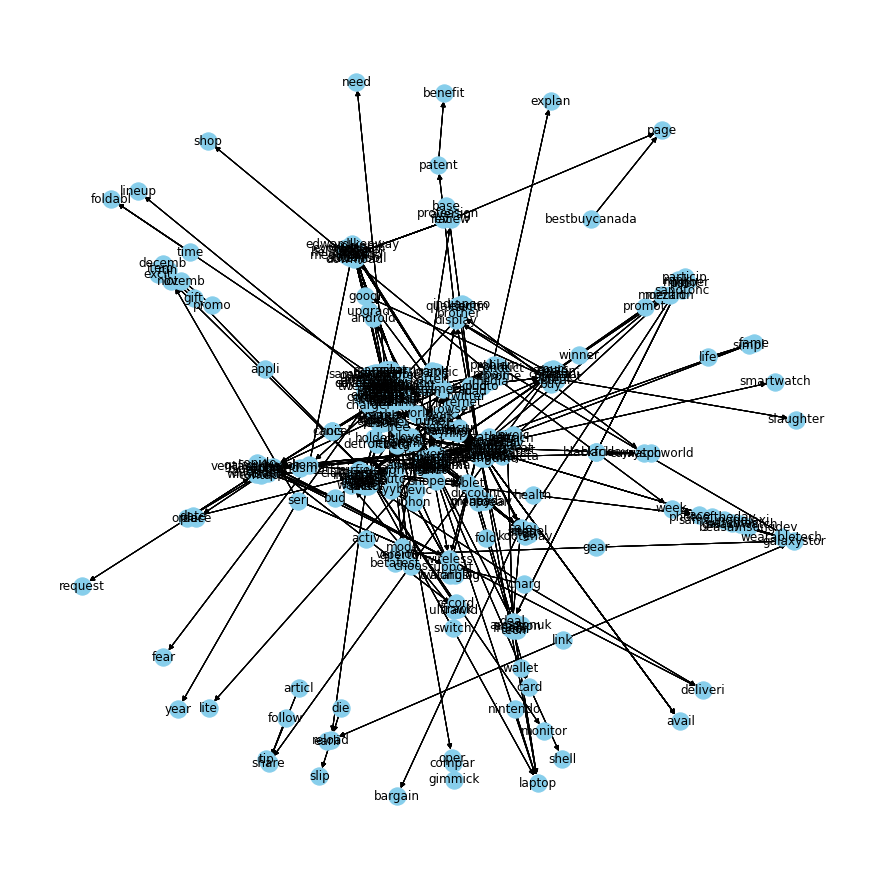

In [45]:
plt.figure(figsize=(12,12))
pos=nx.spring_layout(G_nouns)
nx.draw(G_nouns,with_labels=True,node_color='skyblue',edge_cmap=plt.cm.Blues,pos=pos)
plt.show()

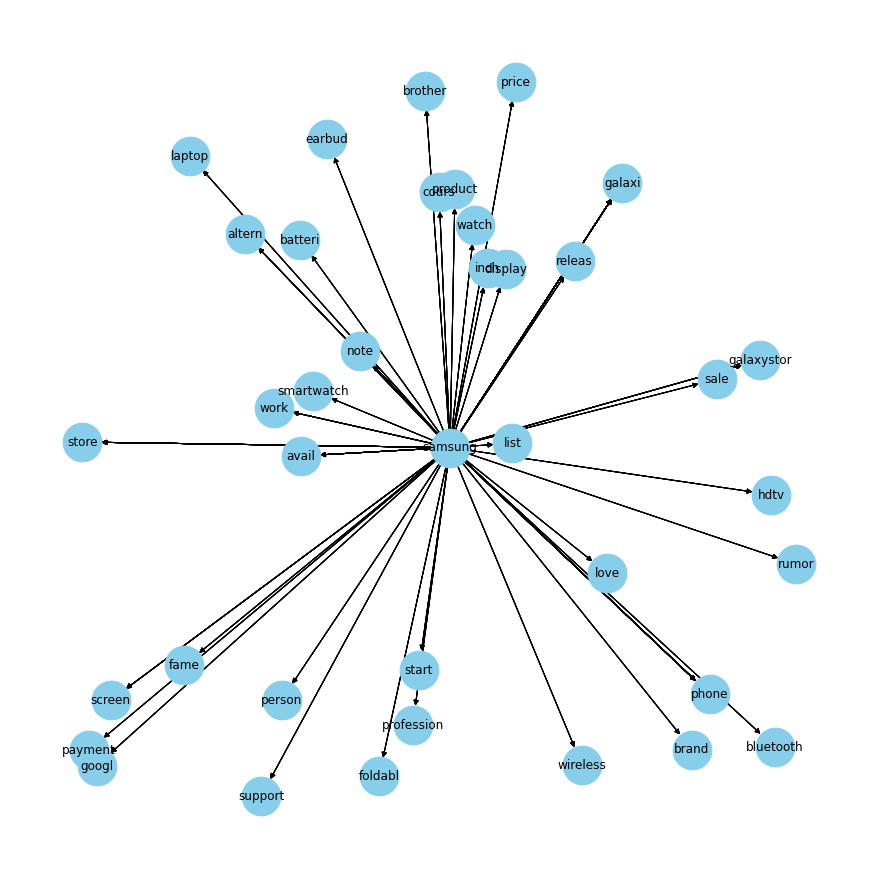

In [46]:
#galaxys6=kg_df[kg_df['source']=="galaxys6"]
G_nouns=nx.from_pandas_edgelist(kg_df[kg_df['source']=="samsung"],"source","target",
                               edge_attr=None,create_using=nx.MultiDiGraph()) 

plt.figure(figsize=(12,12))
pos=nx.spring_layout(G_nouns,k=0.0001) #k regulates the distance between nodes
nx.draw(G_nouns,with_labels=True,node_color='skyblue',node_size=1500,edge_cmap=plt.cm.Blues,pos=pos)
plt.show()


In [47]:
source=list(kg_df['source'].values)
target=list(kg_df['target'].values)

noun_pairs_total=source+target
top_noun_phrases=Counter(noun_pairs_total).most_common()
selected_noun_phrases=[]
for term,count in top_noun_phrases:
    if count>3:
        selected_noun_phrases.append(term)

In [48]:
selected_noun_phrases[0:25]

['samsung',
 'phone',
 'galaxi',
 'note',
 'rate',
 'store',
 'screen',
 'price',
 'appl',
 'brand',
 'repair',
 'galaxystor',
 'deal',
 'peopl',
 'earbud',
 'sale',
 'cell',
 'list',
 'support',
 'altern',
 'love',
 'display',
 'android',
 'work',
 'review']

In [49]:
#removing some common entities like Samsung,Galaxy series phones etc by using the results from LDA and NMF
combined_terms=[term for term in selected_noun_phrases if term in list(finalized_counts.index)]

In [50]:
combined_terms
##Inference: Top topics were mostly relevant, However they are few series names of phones that are repeated the most

['phone',
 'galaxi',
 'note',
 'rate',
 'store',
 'screen',
 'appl',
 'brand',
 'repair',
 'deal',
 'peopl',
 'earbud',
 'sale',
 'altern',
 'display',
 'android',
 'work',
 'review',
 'googl',
 'order',
 'wireless',
 'camera',
 'tablet',
 'download',
 'automobil',
 'pali',
 'bud',
 'seri',
 'product',
 'test',
 'record',
 'face',
 'payment',
 'avail',
 'ipad',
 'ultra',
 'differ',
 'inch',
 'watchfac',
 'point',
 'method',
 'holder',
 'activ',
 'black',
 'buy',
 'galaxywatch',
 'come',
 'flip',
 'fold',
 'steal',
 'tech',
 'glass',
 'docomo',
 'clubberbabi',
 'mount',
 'smartphon',
 'headphon',
 'great',
 'go',
 'need',
 'year',
 'lite']

In [51]:
##Out of the top topics use word embedding to create a matrix (topic-topic similarity matrix)
## that counts the common occurances using word embedding

##Intention behind creating. To use the matrix and combine the words to form a base topic(like camera,capture,shoot to have)

In [52]:
import numpy as np #array related
size=len(combined_terms)
transitionMatrix=np.zeros((size,size))
transitionMatrix

row=0
for word in combined_terms:
    for column in range(len(combined_terms)):
        try:
            transitionMatrix[row][column]=model_glove_twitter.similarity(word,combined_terms[column])
        except:
            transitionMatrix[row][column]=0
    
    row+=1

In [53]:
transitionMatrix.shape

(62, 62)

In [54]:
similarity_matrix=pd.DataFrame(transitionMatrix,columns=combined_terms,index=combined_terms)

In [55]:
similarity_matrix=pd.DataFrame(transitionMatrix,columns=combined_terms,index=combined_terms)
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(transitionMatrix)
df_clusters=pd.DataFrame()
df_clusters['labels']=kmeans.labels_
df_clusters['topics']=combined_terms

In [56]:
df_clusters[df_clusters['labels']==3]

,labels,topics
10,3,peopl
13,3,altern
18,3,googl
24,3,automobil
25,3,pali
36,3,differ
38,3,watchfac
45,3,galaxywatch
53,3,clubberbabi
55,3,smartphon
